# Hyperparameters and Model Validation

We saw earlier the buy-n-large framework of implementing a supervised Machine Learning model.

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

A huge part of this whole process is choosing the model, tuning the parameters of the model and then training and testing of the trained model. Let's have a deeper look into this.

## Model Validation

The concept of Model validation is pretty straight forward. Testing the prediction of the model on a provided training data with known output.

Here's a naive approach to this problem.

### The wrong way

We've used this approach in one of the previous sections. 

In [43]:
import seaborn as sns
Dataset=sns.load_dataset('iris')
Dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:

X_data=Dataset.iloc[:,:4]
Y_data=Dataset.iloc[:,4]


Now we choose a model to train this data on. For this instance we'll pick k-neighbours.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(
    n_neighbors=1
)

Now we train the model

In [46]:
model.fit(X_data,Y_data)
Y_pred=model.predict(X_data)

And then we calculate it's accuracy.

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
# confusion_matrix(Y_data,Y_pred)
accuracy_score(Y_data,Y_pred)

1.0

From the accuracy above, it should be pretty evident that our model is performing perfectly which is false. Our model trains and evaluates on the same data. Furthermore, the K-nearest-neighbourhood algorithm is an instance based algorithm. i.e. it simply stores the data and predicts the labels of each new data point based on the class of the nearest data points in the training dataset. Here the each data point it tries to predict the label of is already in the dataset. It'll obviously be always right in such a case.

### The right way: Holdout Sets

A correct evaluation can be made by training the model on a subset of the dataset so that we don't over train the model and our evaluation method stays more critical and realistic during evaluation.

In [48]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X_data,Y_data,train_size=.5)

In [49]:
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

accuracy_score(Y_test,Y_pred)

0.9733333333333334

Here, although our model is not performing perfectly, the accuracy seems more realistic and true since it was tested on data that the model was oblivious of while training.

### Another way: Cross Validation

One disadvantage of this is that a significant chunk of data is just wasted into testing the model. Above we see how in the train_test_split we set 50% of the data aside just for  testing purpose. Also, this will always be the case where there's a majority of data points of a certain class in one split and a minority of the same class in the other. This means that the testing and training is, although happening on the same dataset, but both the different sections have different balance between classes. Thus the training is biased towards that one class that is in majority and the process would not testing the model as strongly on that one class as it will on all the other classes.

To battle this what can be done is that we can train two separate models and find the average of their accuracies.
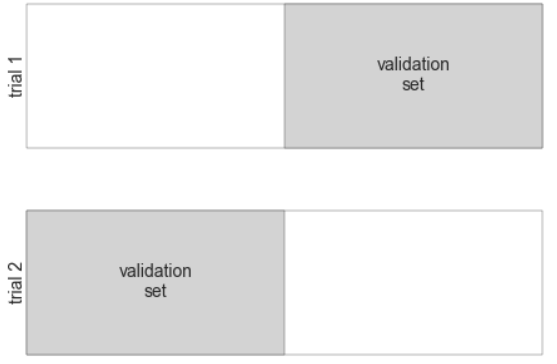 

In [71]:
Y_pred_testedontest=model.fit(X_train,Y_train).predict(X_test)
Y_pred_testedontrain=model.fit(X_test,Y_test).predict(X_train)
accuracy_score(Y_test,Y_pred_testedontest),accuracy_score(Y_train,Y_pred_testedontrain)

(0.9733333333333334, 0.9466666666666667)

Now we can find the average of both of these accuracies which will become our main model accuracy.

To make things more robust, we can segment the dataset into more sections and the treat each section as the validation set to test the training of the rest of the dataset.

Let's implement a 5-fold cross-validation framework in the above dataset.

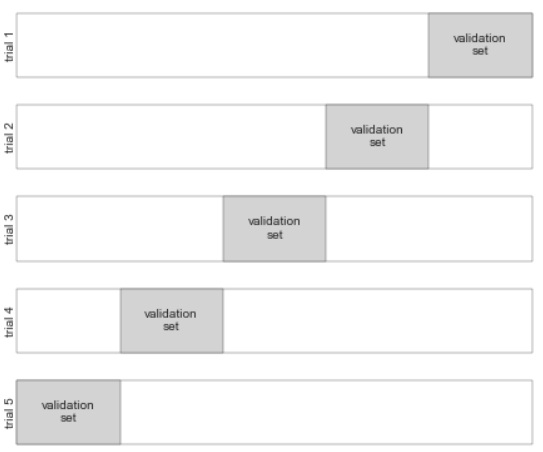

We can do this with this facility provided within Scikit-learn as follows.

In [80]:
from sklearn.model_selection import cross_validate

CrossValidationScores=cross_validate(model,X_data,Y_data,cv=5,verbose=1000000,)
CrossValidationScores['test_score'].mean()

[CV] START .....................................................................
[CV] END ......................................., score=0.967 total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.967 total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.933 total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ......................................., score=0.933 total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

0.96

Now, The performance of the model can be calculated as the average of these 5 test scores.

***Remember*** Each fold of the dataset trains a fresh instance of the model being trained and the testing provides 5 different test scores each of these instance. The end goal here is not to pick the best performing model but to gauge the overall performance of the model under slight variations of the constant playing field (dataset) and a fixed model configuration (model hyperparameters). **It is to evaluate the algorithm under a certain usage scenario**. The variation of models created in this instance can tell us a lot about the likelihood of failure(by acessing the variation in test scores), the robustness and the best set of hyper parameters to employe to generate the best model.

This cross validation can be implemented another an extreme manner where the number of folds is equal to the number of samples in the dataset. i.e. each fold tests on one instance of the dataset after training on every other instance. this would yield in `n_samples` number of test scores who's average can prove to be an evaluation of the algorithm and it's hyperparameter being implemented.

The `LeaveOneOut()` class comes handy here. This is a "cross validator" i.e. implementing one instance of this initiates defination of a `LeaveOneOut()` object that then can be used at a crossvalidator in algorithms

In [104]:
from sklearn.model_selection import LeaveOneOut

Implemented_with_leaveoneout=cross_validate(model,X_data,Y_data,cv=LeaveOneOut())

In [112]:
Implemented_with_leaveoneout['test_score'].mean()

0.96

Just like `LeaveOneOut()` many more crossvalidators are available under the `sklearn.model_selection` submodule. Try discovering this using the IPython interface.

## Selecting the best model

Now that we've learnt the basics of validation and cross-validation, let's discuss a more important concept, What do we do if our estimator underperforms? How do we move forward in such a case?

The following is the course of action that can now help in solving this issue

1. Use more complicated/more flexible model.
2. Use less complicated/less flexible model.
3. Gather more training samples.
4. Gather more data to add features to each sample.

The answer to this question is what make the model fitting problem complicated. Sometimes using more complicated models worsens the problem. Sometimes adding more samples to the training processes can make no difference to the model's performance. It's the mastery of this that makes a machine learning practitioner successful.

### The Bias-variance trade-off

This whole problem of finding the best fitting model for the data is finding that sweet spot between bias and variance. Consider the following figure which presents two regression fits to the dataset.

![alt text](05.03-bias-variance.png)

Looking at these two models, we can see they both miss the mark, but in different ways.


Take the left model – it tries to solve everything with a simple straight line. While that's straightforward, it's also too simplistic for our complex dataset. We call this underfitting: the model is too rigid to capture the data's true patterns. In technical terms, we'd say it has high bias.


On the right, we've got the opposite problem. This model uses a fancy high-order polynomial that basically traces every single data point perfectly. Sure, it matches our training data beautifully, but it's probably just memorizing the noise rather than learning the underlying pattern. That's what we call overfitting: the model is so flexible that it's picking up on random fluctuations instead of the real trends. In other words, it has high variance.


Both cases highlight a classic challenge in data science: finding that sweet spot between too simple and too complex.

To look at this in another light, let's try to see how the model behaves when it's introduced to test on data it's never seen before.


![alt text](05.03-bias-variance-2.png)

Here, the metric that's been used to calculate the performance of the estimator is called the $R^2$ score. 

Say if you were to find the sum of squares of the differences between each prediction from it's true value. This measure would give us the total sum of the squared errors of our model. Say if this value was to be subtracted from sum of squares of deviations from the mean of the data, i.e. the variance. This would give us a measure of how far away the overall deviations of the model are from the data's variance( the overall deviations of the datapoints from it's mean).

When this measure is divided by the variance, it gives us a measure of how deviated the model is compared to the deviations from the mean.

If this measure turns out to be 0, it would mean that the model is as deviated as the mean is compared to all the other data points. If this measure is 1 then this would mean that the diviations of the model predictions from their true values are nothing compared to the variance of the model.

Say if on the other end of the spectrum, this value turns out to be negative, then this would mean that the model is much worse than how sparsely the data is spread out across the output field.

From the above description, we can make out that an underfitted model would give somewhat similar R2 scores in training and validation but an over fitted model would give really good R2 scores during training but very poor validation evaluation.

Ideally, a model should behave like the graph describes below.

![alt text](05.03-validation-curve.png)

This figure points out a lot of trends you will come across during building model.

1. The training score of a model would always turn out the be greated than the validation score, whether it's under-fitting or over-fitting the data.
2. The simplest and least complex models would show similar training and testing performances. This would usually mean that the model is underfitting the data it has trained on.
3. Really complex models would over fit the data while training and yield surprisingly counterintuitive training and validation scores, where it outperforms in training evaluations but underperforms while testing.
4. This means that a sweet middle exists, where the validation score of the model is not too bad, and not too good either. This also means that **the better the simplest of the model performs, the more the chances of more complicated models performing before the performance starts to decline due to over complication.**

The process of tuning the complexity of the model varies from model to model which we will dive deeper into, as we progress through the course of this walkthrough.